In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

import sys 
import seaborn as sns 
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from scipy.stats import t, normaltest, bartlett, levene, ttest_1samp, ttest_ind, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 9 
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.unicode_minus'] = False

### 문제1

- 식빵의 무게가 500g이라고 표시되어 있지만, 500g이 맞는지 의구심이 들었음

- 25일간 측정한 빵의 평균 무게는 480g.
- 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾가 컴플레인을 하는게 맞을까?

In [4]:
origin = pd.read_excel("../rawdata/bread.xlsx")

In [6]:
origin.head()

,무게
0,482
1,479
2,485
3,474
4,479


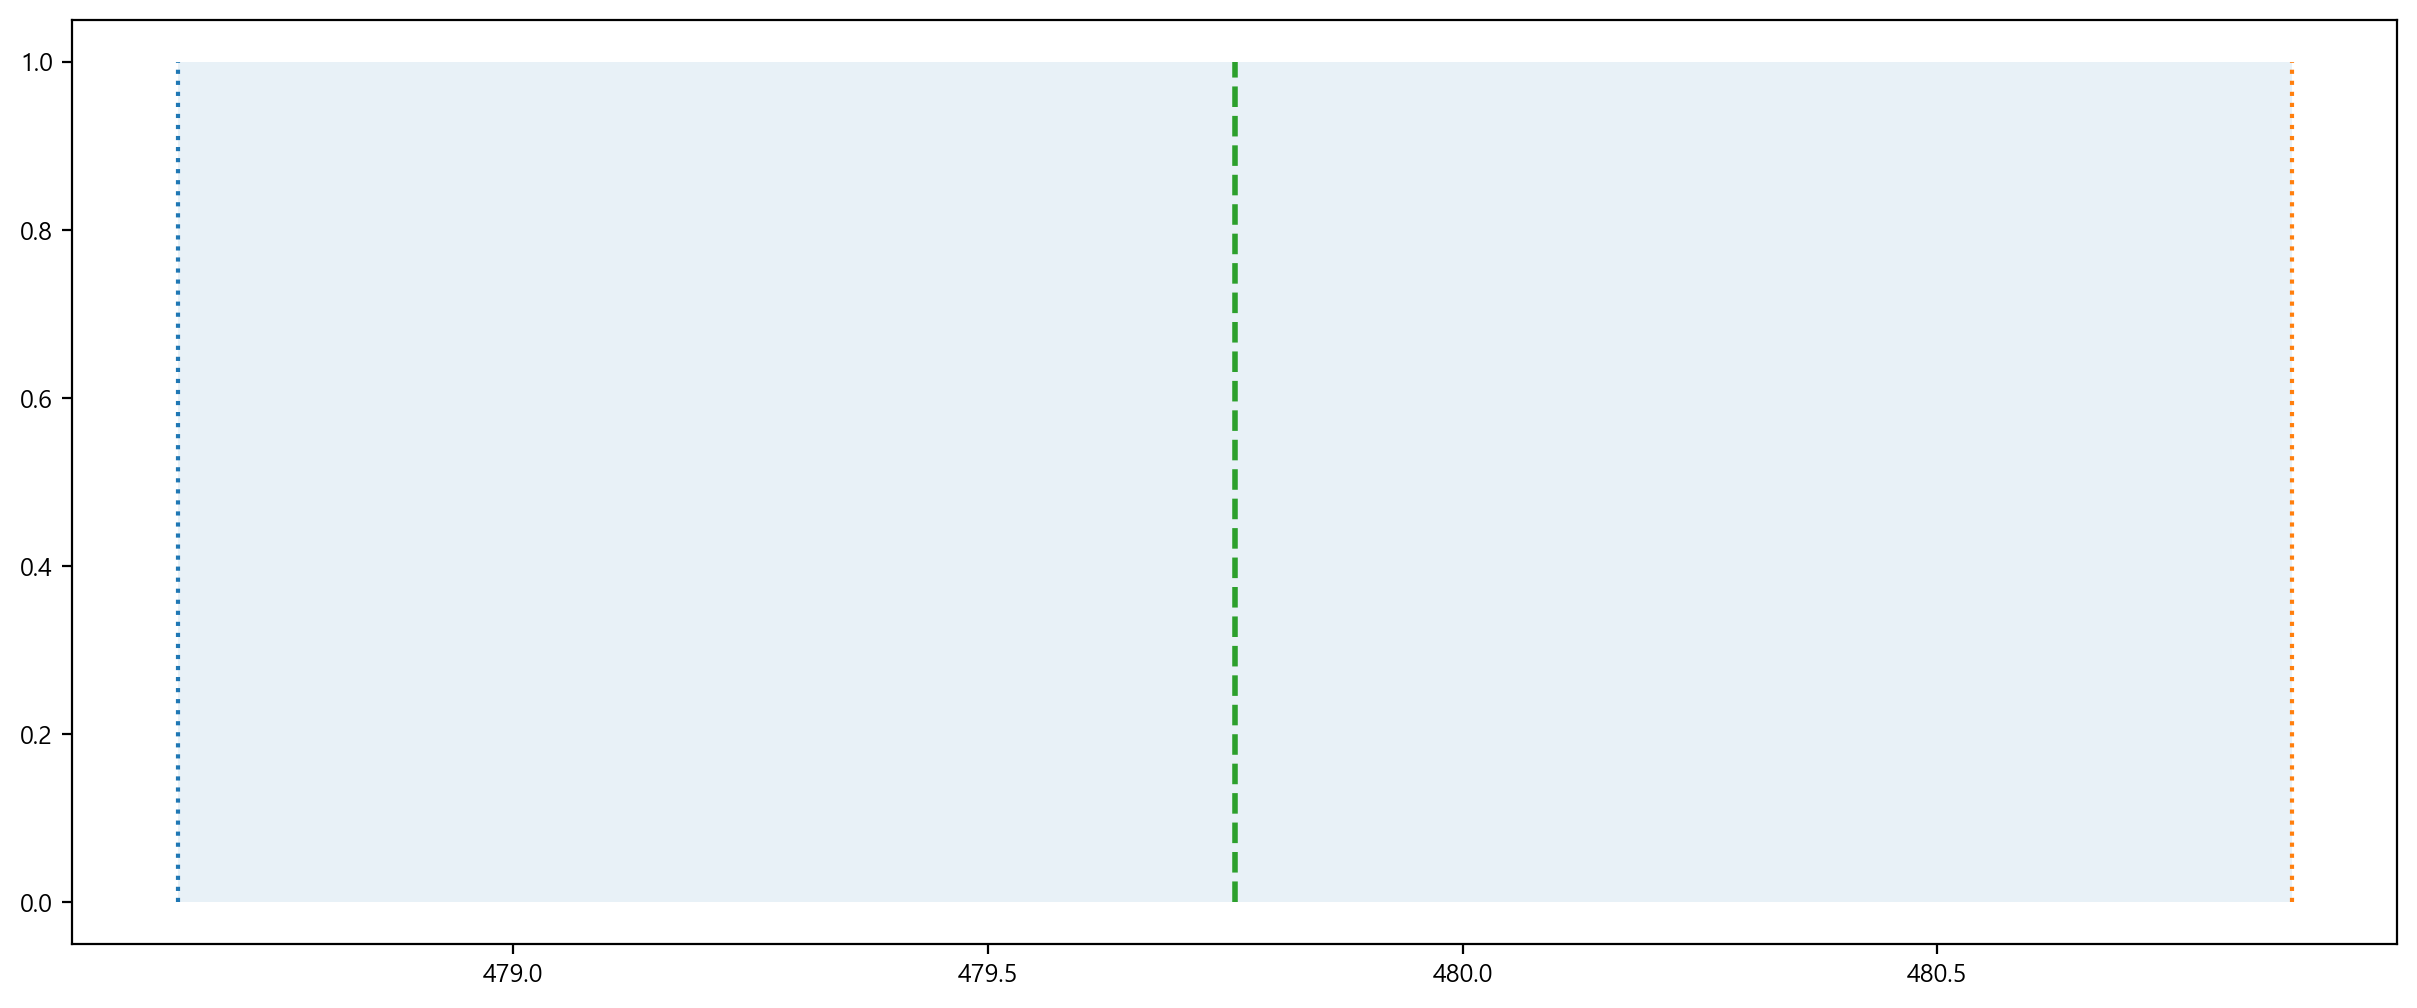

In [8]:
# 데이터 분포 확인

plt.figure()

for c in origin.columns:
    
    data = origin[c]
    max = data.max()
    clevel = 0.95 
    dof = len(data) - 1
    sample_mean = data.mean()
    sample_std = data.std(ddof=1)
    sample_std_error = sample_std / sqrt(len(data))
    
    # 신뢰구간
    cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
    
    xmin, xmax, ymin, ymax = plt.axis()
    
    # 신뢰구간 그리기 
    plt.plot([cmin, cmin], [ymin, ymax], linestyle=":")
    plt.plot([cmax, cmax], [ymin, ymax], linestyle=":")
    plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)
    
    # 평균 그리기 
    plt.plot([sample_mean, sample_mean], [0, ymax], linestyle="--", linewidth=2)